In [1]:
import keras
from keras import layers, regularizers

In [ ]:
learning_rate = 1e-4
dropout_rate = 0.7
validation_rate = 0.3

In [3]:
# 알렉스넷을 2클래스(dog, cat)로 수정
alexnet = keras.Sequential()

alexnet.add(layers.Input(shape=(227, 227, 3)))
alexnet.add(layers.Conv2D(filters=96, kernel_size=11, strides=4, activation='relu',
                        kernel_initializer='he_normal',
                        kernel_regularizer=regularizers.l2(0.01)))
alexnet.add(layers.MaxPooling2D(pool_size=3, strides=2))
alexnet.add(layers.Conv2D(filters=256, kernel_size=5, padding='same', activation='relu',
                        kernel_initializer='he_normal',
                        kernel_regularizer=regularizers.l2(0.01)))
alexnet.add(layers.MaxPooling2D(pool_size=3, strides=2))
alexnet.add(layers.Conv2D(filters=384, kernel_size=3, padding='same', activation='relu',
                        kernel_initializer='he_normal',
                        kernel_regularizer=regularizers.l2(0.01)))
alexnet.add(layers.Conv2D(filters=384, kernel_size=3, padding='same', activation='relu',
                        kernel_initializer='he_normal',
                        kernel_regularizer=regularizers.l2(0.01)))
alexnet.add(layers.Conv2D(filters=256, kernel_size=3, padding='same', activation='relu',
                        kernel_initializer='he_normal',
                        kernel_regularizer=regularizers.l2(0.01)))
alexnet.add(layers.MaxPooling2D(pool_size=3, strides=2))
alexnet.add(layers.Flatten())
alexnet.add(layers.Dense(4096, activation='relu',
                        kernel_initializer='he_normal',
                        kernel_regularizer=regularizers.l2(0.01)))
alexnet.add(layers.Dropout(dropout_rate))
alexnet.add(layers.Dense(4096, activation='relu',
                        kernel_initializer='he_normal',
                        kernel_regularizer=regularizers.l2(0.01)))
alexnet.add(layers.Dropout(dropout_rate))
alexnet.add(layers.Dense(2, activation='softmax'))  # 2클래스로 변경

alexnet.summary()

2025-07-07 20:16:41.197795: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M4 Max
2025-07-07 20:16:41.197814: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 64.00 GB
2025-07-07 20:16:41.197819: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 24.00 GB
2025-07-07 20:16:41.197830: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-07-07 20:16:41.197840: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 55, 55, 96)     │        34,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 27, 27, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 27, 27, 256)    │       614,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 13, 13, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 13, 13, 384)    │       885,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 13, 13, 384)    │     1,327,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 13, 13, 256)    │       884,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4096)           │    37,752,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │         8,194 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 58,289,538 (222.36 MB)

 Trainable params: 58,289,538 (222.36 MB)

 Non-trainable params: 0 (0.00 B)

In [4]:
data_path = '../data/dogs-vs-cats'

In [5]:

import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# 한글 폰트 설정
plt.rcParams['font.family'] = 'AppleGothic'  # 맥OS용 한글 폰트
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 부호 깨짐 방지

from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
import tensorflow as tf

# 데이터 경로 설정
data_path = '../data/dogs-vs-cats/train'

def load_dogs_cats_data(data_path, sample_size=1000):
    """
    Dogs vs Cats 데이터 로드
    sample_size: 메모리 절약을 위한 샘플 수 (None이면 전체 데이터)
    """
    images = []
    labels = []
    
    # 파일 목록 가져오기
    files = os.listdir(data_path)
    
    # 샘플링 (전체 데이터는 너무 크므로)
    if sample_size:
        files = files[:sample_size]
    
    print(f"총 {len(files)}개 파일 로드 중...")
    
    for i, filename in enumerate(files):
        if filename.endswith('.jpg'):
            # 파일명에서 라벨 추출
            if filename.startswith('cat'):
                label = 0  # cat
            elif filename.startswith('dog'):
                label = 1  # dog
            else:
                continue
            
            # 이미지 로드 및 전처리
            img_path = os.path.join(data_path, filename)
            try:
                img = Image.open(img_path).convert('RGB')
                img = img.resize((227, 227))  # AlexNet 입력 크기
                img_array = np.array(img) / 255.0  # 정규화
                
                images.append(img_array)
                labels.append(label)
                
                if (i + 1) % 100 == 0:
                    print(f"처리 완료: {i + 1}/{len(files)}")
                    
            except Exception as e:
                print(f"에러 발생 ({filename}): {e}")
                continue
    
    print(f"로드 완료: {len(images)}개 이미지")
    return np.array(images), np.array(labels)

# 데이터 로드 (샘플 1000개로 시작)
#X, y = load_dogs_cats_data(data_path, sample_size=1000)
X, y = load_dogs_cats_data(data_path, sample_size=None)

print(f"이미지 형태: {X.shape}")
print(f"라벨 형태: {y.shape}")
print(f"고양이 개수: {np.sum(y == 0)}")
print(f"개 개수: {np.sum(y == 1)}")

총 25000개 파일 로드 중...
처리 완료: 100/25000
처리 완료: 200/25000
처리 완료: 300/25000
처리 완료: 400/25000
처리 완료: 500/25000
처리 완료: 600/25000
처리 완료: 700/25000
처리 완료: 800/25000
처리 완료: 900/25000
처리 완료: 1000/25000
처리 완료: 1100/25000
처리 완료: 1200/25000
처리 완료: 1300/25000
처리 완료: 1400/25000
처리 완료: 1500/25000
처리 완료: 1600/25000
처리 완료: 1700/25000
처리 완료: 1800/25000
처리 완료: 1900/25000
처리 완료: 2000/25000
처리 완료: 2100/25000
처리 완료: 2200/25000
처리 완료: 2300/25000
처리 완료: 2400/25000
처리 완료: 2500/25000
처리 완료: 2600/25000
처리 완료: 2700/25000
처리 완료: 2800/25000
처리 완료: 2900/25000
처리 완료: 3000/25000
처리 완료: 3100/25000
처리 완료: 3200/25000
처리 완료: 3300/25000
처리 완료: 3400/25000
처리 완료: 3500/25000
처리 완료: 3600/25000
처리 완료: 3700/25000
처리 완료: 3800/25000
처리 완료: 3900/25000
처리 완료: 4000/25000
처리 완료: 4100/25000
처리 완료: 4200/25000
처리 완료: 4300/25000
처리 완료: 4400/25000
처리 완료: 4500/25000
처리 완료: 4600/25000
처리 완료: 4700/25000
처리 완료: 4800/25000
처리 완료: 4900/25000
처리 완료: 5000/25000
처리 완료: 5100/25000
처리 완료: 5200/25000
처리 완료: 5300/25000
처리 완료: 5400/25000
처리 완료: 5500/25000

훈련 데이터: (17500, 227, 227, 3), 라벨: (17500,)
검증 데이터: (7500, 227, 227, 3), 라벨: (7500,)


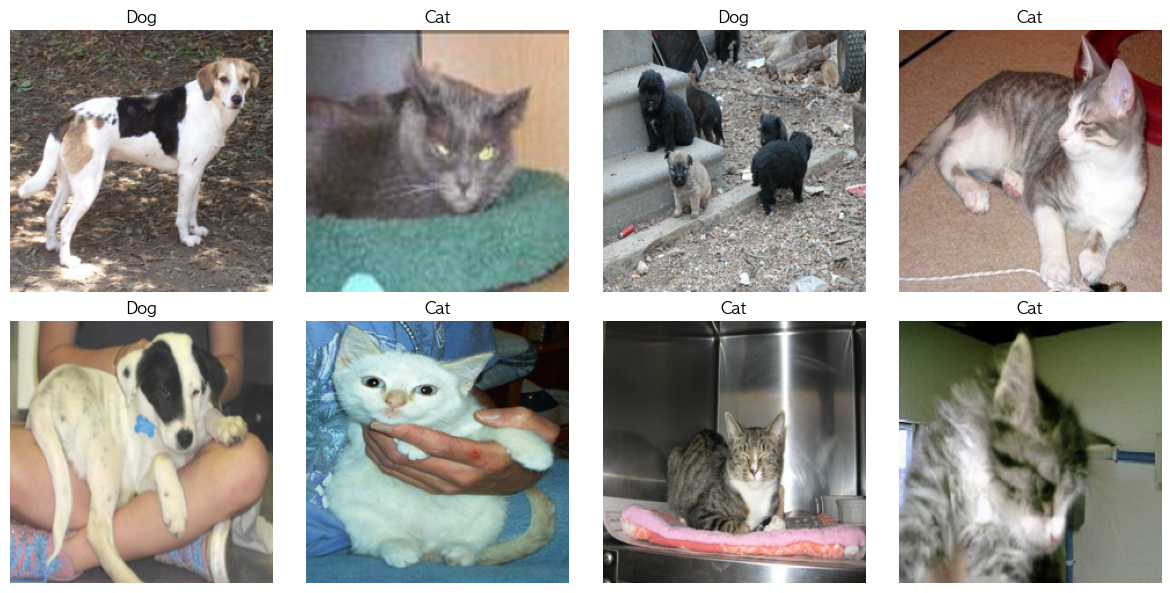

In [6]:
# 훈련/검증 데이터 분할
train_scaled, val_scaled, train_target, val_target = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# 라벨을 원-핫 인코딩
train_target_cat = to_categorical(train_target, num_classes=2)
val_target_cat = to_categorical(val_target, num_classes=2)

print(f"훈련 데이터: {train_scaled.shape}, 라벨: {train_target.shape}")
print(f"검증 데이터: {val_scaled.shape}, 라벨: {val_target.shape}")

# 샘플 이미지 확인
fig, axes = plt.subplots(2, 4, figsize=(12, 6))
for i in range(8):
    row = i // 4
    col = i % 4
    axes[row, col].imshow(train_scaled[i])
    label = "Cat" if train_target[i] == 0 else "Dog"
    axes[row, col].set_title(f"{label}")
    axes[row, col].axis('off')
    
plt.tight_layout()
plt.show()


In [7]:
#print(train_target)
#print(train_target_cat)

In [8]:
# 모델 컴파일
alexnet.compile(
    #optimizer='adam',
    optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# 콜백 설정
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

model_checkpoint = ModelCheckpoint(
    'models/alexnet_binary_5.keras',
    save_best_only=True
)

early_stopping = EarlyStopping(
    #monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

# 학습률 감소 콜백 설정
# val_loss가 3번 연속 개선되지 않으면 학습률을 0.2배로 감소
# 최소 학습률은 0.001로 제한
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',      # 검증 손실을 모니터링
    factor=0.2,              # 학습률 감소 비율 (현재 학습률 * 0.2)
    patience=3,              # 3번 연속 개선되지 않으면 학습률 감소
    min_lr=1e-8             # 최소 학습률 설정
)

callbacks = [model_checkpoint, early_stopping, reduce_lr]
#callbacks = [model_checkpoint, early_stopping]


In [9]:
# 모델 훈련
history = alexnet.fit(
    train_scaled, train_target_cat,
    epochs=100,
    # batch_size=32,
    validation_data=(val_scaled, val_target_cat),
    callbacks=callbacks,
    # verbose=1
)


Epoch 1/100


2025-07-07 20:20:05.444803: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


547/547 ━━━━━━━━━━━━━━━━━━━━ 76s 133ms/step - accuracy: 0.5543 - loss: 123.4208 - val_accuracy: 0.7004 - val_loss: 27.9320 - learning_rate: 1.0000e-04
Epoch 2/100
547/547 ━━━━━━━━━━━━━━━━━━━━ 37s 67ms/step - accuracy: 0.6977 - loss: 20.5822 - val_accuracy: 0.7197 - val_loss: 8.1997 - learning_rate: 1.0000e-04
Epoch 3/100
547/547 ━━━━━━━━━━━━━━━━━━━━ 41s 75ms/step - accuracy: 0.7500 - loss: 6.6467 - val_accuracy: 0.7319 - val_loss: 3.7374 - learning_rate: 1.0000e-04
Epoch 4/100
547/547 ━━━━━━━━━━━━━━━━━━━━ 59s 108ms/step - accuracy: 0.7774 - loss: 3.2065 - val_accuracy: 0.8141 - val_loss: 2.2065 - learning_rate: 1.0000e-04
Epoch 5/100
547/547 ━━━━━━━━━━━━━━━━━━━━ 79s 144ms/step - accuracy: 0.8036 - loss: 2.0445 - val_accuracy: 0.8136 - val_loss: 1.6305 - learning_rate: 1.0000e-04
Epoch 6/100
547/547 ━━━━━━━━━━━━━━━━━━━━ 57s 104ms/step - accuracy: 0.8198 - loss: 1.5413 - val_accuracy: 0.8237 - val_loss: 1.3511 - learning_rate: 1.0000e-04
Epoch 7/100
547/547 ━━━━━━━━━━━━━━━━━━━━ 51s 93ms/

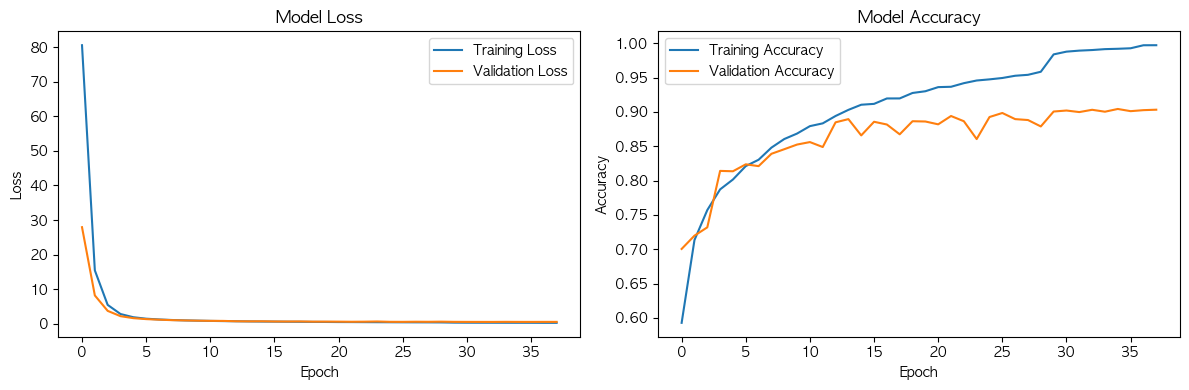

In [10]:
# 훈련 결과 시각화
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# 손실 그래프
ax1.plot(history.history['loss'], label='Training Loss')
ax1.plot(history.history['val_loss'], label='Validation Loss')
ax1.set_title('Model Loss')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.legend()

# 정확도 그래프
ax2.plot(history.history['accuracy'], label='Training Accuracy')
ax2.plot(history.history['val_accuracy'], label='Validation Accuracy')
ax2.set_title('Model Accuracy')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.legend()

plt.tight_layout()
plt.show()

In [12]:
# 최종 성능 평가
final_loss, final_accuracy = alexnet.evaluate(val_scaled, val_target_cat, verbose=1)
print(f"최종 검증 손실: {final_loss:.4f}")
print(f"최종 검증 정확도: {final_accuracy:.4f}")

235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.9047 - loss: 0.5397
최종 검증 손실: 0.5403
최종 검증 정확도: 0.9032


235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step


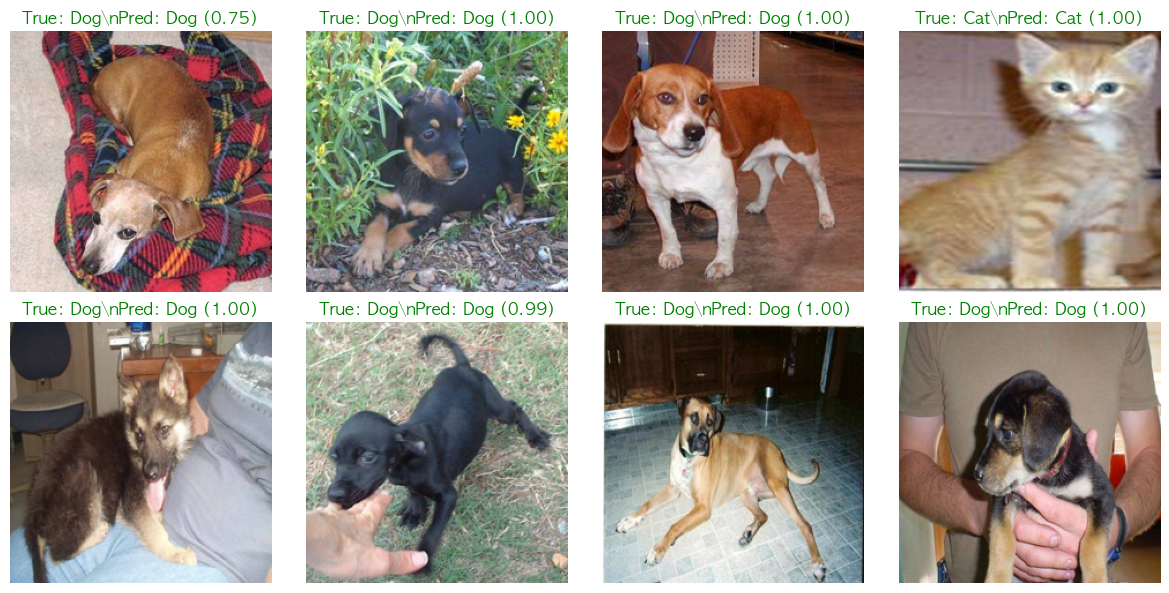

분류 리포트:
              precision    recall  f1-score   support

         Cat       0.92      0.89      0.90      3750
         Dog       0.89      0.92      0.90      3750

    accuracy                           0.90      7500
   macro avg       0.90      0.90      0.90      7500
weighted avg       0.90      0.90      0.90      7500



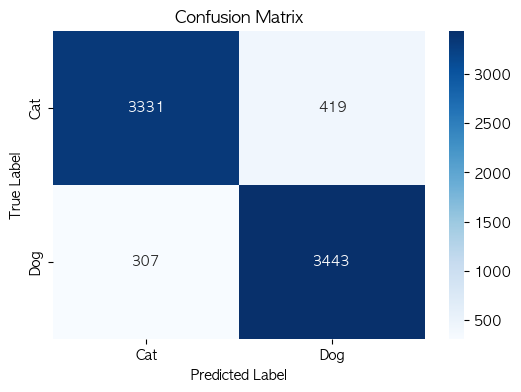

In [17]:
# 예측 결과 시각화
predictions = alexnet.predict(val_scaled)
predicted_classes = np.argmax(predictions, axis=1)

# 몇 개 샘플 예측 결과 확인
fig, axes = plt.subplots(2, 4, figsize=(12, 6))
for i in range(8):
    row = i // 4
    col = i % 4
    
    axes[row, col].imshow(val_scaled[i])
    
    true_label = "Cat" if val_target[i] == 0 else "Dog"
    pred_label = "Cat" if predicted_classes[i] == 0 else "Dog"
    confidence = predictions[i][predicted_classes[i]]
    
    color = 'green' if true_label == pred_label else 'red'
    axes[row, col].set_title(f"True: {true_label}\\nPred: {pred_label} ({confidence:.2f})", 
                            color=color)
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()

# 성능 지표 계산
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

print("분류 리포트:")
print(classification_report(val_target, predicted_classes, target_names=['Cat', 'Dog']))

# 혼동 행렬
cm = confusion_matrix(val_target, predicted_classes)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Cat', 'Dog'], yticklabels=['Cat', 'Dog'])
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


# 더 많은 데이터로 훈련하고 싶을 때 (메모리 주의)
# X_full, y_full = load_dogs_cats_data(data_path, sample_size=None)  # 전체 데이터

# 데이터 증강을 원할 때
from keras.preprocessing.image import ImageDataGenerator

def create_data_generators(train_dir, batch_size=32, target_size=(227, 227)):
    """
    데이터 증강을 포함한 데이터 제너레이터 생성
    """
    train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        validation_split=0.2
    )
    
    train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=target_size,
        batch_size=batch_size,
        class_mode='categorical',
        subset='training'
    )
    
    val_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=target_size,
        batch_size=batch_size,
        class_mode='categorical',
        subset='validation'
    )
    
    return train_generator, val_generator

# 사용 예시 (주석 해제해서 사용)
# train_gen, val_gen = create_data_generators(data_path)
# 
# history = alexnet_binary.fit(
#     train_gen,
#     epochs=20,
#     validation_data=val_gen,
#     callbacks=callbacks
# )

print("데이터 로더 완성!")
print("\\n사용 방법:")
print("1. 현재 설정: 1000개 샘플로 빠른 테스트")
print("2. 전체 데이터: sample_size=None 설정")
print("3. 데이터 증강: create_data_generators() 함수 사용")


In [16]:
import glob
test_path = '../data/cat-dog/images'
test_files = glob.glob(os.path.join(test_path, '*.*'))

print(test_files)









['../data/cat-dog/images/dog.png', '../data/cat-dog/images/cat.png']


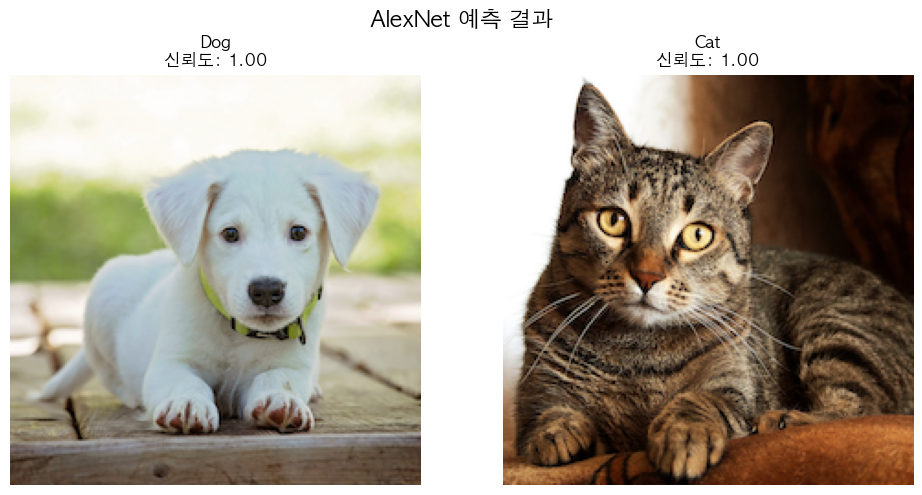

In [ ]:
# 테스트 이미지 예측 및 시각화
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import os
import random

# 모델 로드
alexnet = keras.models.load_model('models/alexnet_binary_5.keras')

# 랜덤하게 2개 이미지 선택
random.seed(42)
selected_files = random.sample(test_files, min(2, len(test_files)))

# 클래스 이름 정의
class_names = ['Cat', 'Dog']

# 이미지 예측 및 시각화
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('AlexNet 예측 결과', fontsize=16)

for i, file_path in enumerate(selected_files):
    # 이미지 로드 및 전처리
    img = Image.open(file_path)
    img_display = img.copy()  # 원본 이미지 표시용
    
    # 모델 입력용 전처리
    img = img.resize((227, 227))
    img_array = np.array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    
    # 예측
    prediction = alexnet.predict(img_array, verbose=0)
    predicted_class = np.argmax(prediction)
    confidence = prediction[0][predicted_class]
    
    # 시각화
    axes[i].imshow(img_display)
    axes[i].set_title(f'{class_names[predicted_class]}\n신뢰도: {confidence:.2f}')
    axes[i].axis('off')

plt.tight_layout()
plt.show()